In [2]:
from dataprep.eda import *
from dataprep.datasets import load_dataset
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


ModuleNotFoundError: No module named 'dataprep'

In [3]:
import pandas as pd
data=pd.read_csv("DATA.csv")
data

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


In [4]:
data.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [5]:
data.info

<bound method DataFrame.info of       Patient_ID     Systemic Illness  Rectal Pain  Sore Throat  \
0             P0                  NaN        False         True   
1             P1                Fever         True        False   
2             P2                Fever        False         True   
3             P3                  NaN         True        False   
4             P4  Swollen Lymph Nodes         True         True   
...          ...                  ...          ...          ...   
24995     P24995                  NaN         True         True   
24996     P24996                Fever        False         True   
24997     P24997                  NaN         True         True   
24998     P24998  Swollen Lymph Nodes        False         True   
24999     P24999  Swollen Lymph Nodes        False        False   

       Penile Oedema  Oral Lesions  Solitary Lesion  Swollen Tonsils  \
0               True          True            False             True   
1               Tru

In [6]:
data.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,18784,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,3,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [7]:
data.head(10)

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
5,P5,Swollen Lymph Nodes,False,True,False,False,False,False,False,False,Negative
6,P6,Fever,False,True,False,False,False,False,True,False,Positive
7,P7,Fever,True,True,False,True,True,True,False,False,Positive
8,P8,Muscle Aches and Pain,False,True,True,True,False,False,False,False,Positive
9,P9,Fever,False,False,True,True,True,False,True,False,Negative


In [8]:
# CHECKING  NO OF MISSING VALUES IN EACH COLUMN
data.isnull().sum()

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

In [9]:
plot_missing(data)

NameError: name 'plot_missing' is not defined

In [10]:
# DISTRIBUTION  OF Positive cases and negative cases 
data['MonkeyPox'].value_counts()

MonkeyPox
Positive    15909
Negative     9091
Name: count, dtype: int64

In [11]:
print('Percentage of No Positive cases: {}%'.format(round(data.MonkeyPox.value_counts()['Positive']/len(data) * 100.0,2)))
print('Percentage of Negative cases: {}%'.format(round(data.MonkeyPox.value_counts()['Negative']/len(data) * 100.0,2)))

Percentage of No Positive cases: 63.64%
Percentage of Negative cases: 36.36%


In [12]:
#Unique values present in every column  
for col in data.columns:
    unique_values=data[col].unique()
    print(f"UNIQUE VALUES IN A COLUMN'{col}':{unique_values}'")
    print()

UNIQUE VALUES IN A COLUMN'Patient_ID':['P0' 'P1' 'P2' ... 'P24997' 'P24998' 'P24999']'

UNIQUE VALUES IN A COLUMN'Systemic Illness':[nan 'Fever' 'Swollen Lymph Nodes' 'Muscle Aches and Pain']'

UNIQUE VALUES IN A COLUMN'Rectal Pain':[False  True]'

UNIQUE VALUES IN A COLUMN'Sore Throat':[ True False]'

UNIQUE VALUES IN A COLUMN'Penile Oedema':[ True False]'

UNIQUE VALUES IN A COLUMN'Oral Lesions':[ True False]'

UNIQUE VALUES IN A COLUMN'Solitary Lesion':[False  True]'

UNIQUE VALUES IN A COLUMN'Swollen Tonsils':[ True False]'

UNIQUE VALUES IN A COLUMN'HIV Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'Sexually Transmitted Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'MonkeyPox':['Negative' 'Positive']'



In [13]:
#Converting the text into numerical of all the columns 
features=["Rectal Pain","Sore Throat","Penile Oedema","Oral Lesions","Solitary Lesion","Swollen Tonsils","HIV Infection","Sexually Transmitted Infection"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_9828\270484086.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [14]:
data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})

C:\Users\pulip\AppData\Local\Temp\ipykernel_9828\2458704213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})


In [15]:
import pandas as pd

# Fill missing values with a specific value
data['Systemic Illness'].fillna('Unknown', inplace=True)

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['Systemic Illness'])

# Print the first few rows of the preprocessed data
print(data.head())

  Patient_ID  Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  \
0         P0            0            1              1             1   
1         P1            1            0              1             1   
2         P2            0            1              1             0   
3         P3            1            0              0             0   
4         P4            1            1              1             0   

   Solitary Lesion  Swollen Tonsils  HIV Infection  \
0                0                1              0   
1                0                0              1   
2                0                0              1   
3                1                1              1   
4                0                1              1   

   Sexually Transmitted Infection  MonkeyPox  Systemic Illness_Fever  \
0                               0          0                   False   
1                               0          1                    True   
2                               

C:\Users\pulip\AppData\Local\Temp\ipykernel_9828\1155651068.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Systemic Illness'].fillna('Unknown', inplace=True)


In [16]:
#Converting the text into numerical of all the columns 
features=["Systemic Illness_Fever","Systemic Illness_Muscle Aches and Pain", "Systemic Illness_Swollen Lymph Nodes","Systemic Illness_Unknown"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_9828\3163387298.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [17]:
data['Patient_ID'] = data['Patient_ID'].str.replace('P','', regex=False).astype(int)

In [18]:
data

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_Unknown
0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
1,1,1,0,1,1,0,0,1,0,1,1,0,0,0
2,2,0,1,1,0,0,0,1,0,1,1,0,0,0
3,3,1,0,0,0,1,1,1,0,1,0,0,0,1
4,4,1,1,1,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,1,1,0,1,1,0,0,1,1,0,0,0,1
24996,24996,0,1,1,0,1,1,1,1,1,1,0,0,0
24997,24997,1,1,0,0,1,1,0,0,1,0,0,0,1
24998,24998,0,1,0,1,1,1,0,0,0,0,0,1,0


In [19]:
data.head(10)  # None =0  fever=1  Swollen Lymph Nodes=2  Muscle Aches and Pain=3

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_Unknown
0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
1,1,1,0,1,1,0,0,1,0,1,1,0,0,0
2,2,0,1,1,0,0,0,1,0,1,1,0,0,0
3,3,1,0,0,0,1,1,1,0,1,0,0,0,1
4,4,1,1,1,0,0,1,1,0,1,0,0,1,0
5,5,0,1,0,0,0,0,0,0,0,0,0,1,0
6,6,0,1,0,0,0,0,1,0,1,1,0,0,0
7,7,1,1,0,1,1,1,0,0,1,1,0,0,0
8,8,0,1,1,1,0,0,0,0,1,0,1,0,0
9,9,0,0,1,1,1,0,1,0,0,1,0,0,0


In [20]:
data.tail(10)

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_Unknown
24990,24990,0,0,1,1,0,0,1,0,0,0,1,0,0
24991,24991,0,1,0,0,1,0,1,1,1,1,0,0,0
24992,24992,1,0,1,0,0,0,0,1,0,0,0,0,1
24993,24993,1,1,1,0,0,0,0,1,1,0,0,0,1
24994,24994,0,1,1,0,0,0,1,1,1,1,0,0,0
24995,24995,1,1,0,1,1,0,0,1,1,0,0,0,1
24996,24996,0,1,1,0,1,1,1,1,1,1,0,0,0
24997,24997,1,1,0,0,1,1,0,0,1,0,0,0,1
24998,24998,0,1,0,1,1,1,0,0,0,0,0,1,0
24999,24999,0,0,1,0,0,1,1,0,1,0,0,1,0


In [21]:
print(data.dtypes)

Patient_ID                                int32
Rectal Pain                               int64
Sore Throat                               int64
Penile Oedema                             int64
Oral Lesions                              int64
Solitary Lesion                           int64
Swollen Tonsils                           int64
HIV Infection                             int64
Sexually Transmitted Infection            int64
MonkeyPox                                 int64
Systemic Illness_Fever                    int64
Systemic Illness_Muscle Aches and Pain    int64
Systemic Illness_Swollen Lymph Nodes      int64
Systemic Illness_Unknown                  int64
dtype: object


In [22]:
# mapping={'None':0,'fever':1,'Swollen Lymph Nodes':2,'Muscle Aches and Pain':3}
#data['Systemic Illness']=data['Systemic Illness'].map(mapping)

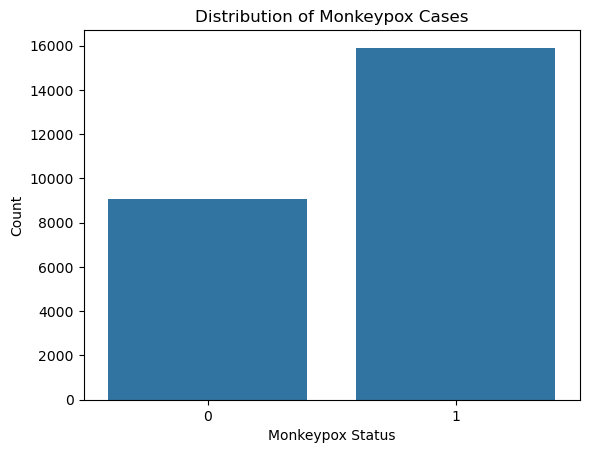

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing the distribution of positive and negative cases
sns.countplot(x='MonkeyPox', data=data)
plt.title('Distribution of Monkeypox Cases')
plt.xlabel('Monkeypox Status')
plt.ylabel('Count')
plt.show()

# FEATURE SELECTION PROCESS

Firstly  Let's  Apply  Logistic Regression  using  all  the  features  to  acquire  a baseline Accuracy .

Note : all categorical variables are converted to numerical values 


Performance Metrics:
Accuracy: 0.6974
Precision: 0.7247
Recall: 0.8611
Specificity: 0.3945
ROC/AUC: 0.7076
Confusion Matrix:
[[ 692 1062]
 [ 451 2795]]


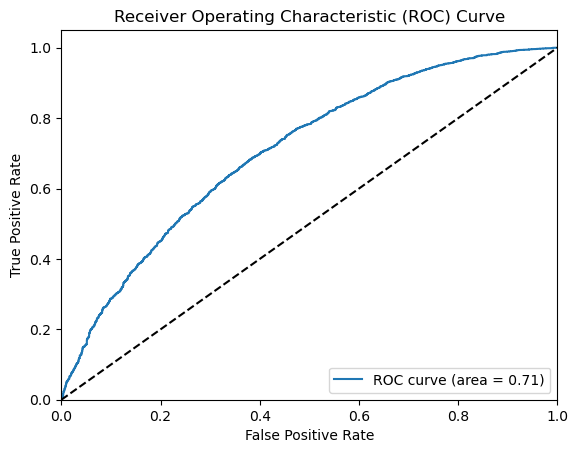

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression
logistic_model = LogisticRegression(random_state=42)

# Use RFE to select the top k features
k = 6 # Specify the number of features to select
rfe = RFE(estimator=logistic_model, n_features_to_select=k)
rfe.fit(X_train_scaled, y_train)

# Get the selected feature names
selected_features = X.columns[rfe.support_]

# Transform the training and test sets to only include selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Logistic Regression model using only the selected features
logistic_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features and accuracy
print("Selected Features:", selected_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

Selected Features: ['Rectal Pain', 'HIV Infection', 'Sexually Transmitted Infection', 'Systemic Illness_Fever', 'Systemic Illness_Muscle Aches and Pain', 'Systemic Illness_Unknown']
Accuracy: 0.6964


# Now Let's Apply the Genetic algorithm for Feature selection :
    1.GA (Logistic Regression)
      GA (Random forest)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm parameters
population_size = 50
num_generations = 100
mutation_rate = 0.1

# Function to evaluate fitness
def fitness_function(chromosome):
    selected_features = X_train.columns[chromosome.astype(bool)]
    
    if len(selected_features) == 0:
        return 0.01  # Low fitness for empty feature set
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    
    return accuracy_score(y_test, y_pred)

# Initialize population
population = np.random.randint(2, size=(population_size, X.shape[1]))

# Evolve the population
for generation in range(num_generations):
    # Evaluate fitness
    fitness_scores = [fitness_function(chromosome) for chromosome in population]
    
    # Selection (Tournament Selection)
    selected_indices = np.random.choice(population_size, size=population_size, replace=True)
    parents = population[selected_indices]
    
    # Crossover (One-Point Crossover)
    offspring = np.copy(parents)
    crossover_points = np.random.randint(1, X.shape[1], size=population_size // 2)
    for i in range(0, population_size, 2):
        if i + 1 < population_size:  # Ensure we don't go out of bounds
            offspring[i, crossover_points[i // 2]:] = parents[i + 1, crossover_points[i // 2]:]
            offspring[i + 1, crossover_points[i // 2]:] = parents[i, crossover_points[i // 2]:]
    
    # Mutation
    mutation_mask = np.random.rand(population_size, X.shape[1]) < mutation_rate
    offspring = np.where(mutation_mask, 1 - offspring, offspring)
    
    # Replace population with offspring
    population = offspring

# Evaluate final population
fitness_scores = [fitness_function(chromosome) for chromosome in population]
best_chromosome = population[np.argmax(fitness_scores)]

# Print the selected features
selected_features = X.columns[best_chromosome.astype(bool)]
print("Selected Features:", selected_features)

# Calculate and print additional metrics
model = LogisticRegression(max_iter=1000)
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
y_pred_proba = model.predict_proba(X_test[selected_features])[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

KeyboardInterrupt: 

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm Parameters
population_size = 20
num_generations = 10
mutation_rate = 0.1
num_features = X.shape[1]

# Create initial population
def create_population(size, num_features):
    return [random.sample(range(num_features), k=random.randint(1, num_features)) for _ in range(size)]

# Evaluate fitness of each individual
def evaluate_fitness(individual):
    if len(individual) == 0:  # Avoid empty feature set
        return 0
    X_train_selected = X_train.iloc[:, individual]
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test.iloc[:, individual])
    return accuracy_score(y_test, y_pred)

# Selection process
def select_parents(population):
    fitness_scores = [evaluate_fitness(ind) for ind in population]
    selected_indices = np.argsort(fitness_scores)[-len(population)//2:]  # Select top half
    return [population[i] for i in selected_indices]

# Crossover process
def crossover(parent1, parent2):
    if len(parent1) > 1 and len(parent2) > 1:  # Ensure both parents have more than one feature
        point = random.randint(1, min(len(parent1), len(parent2)) - 1)
        return parent1[:point] + parent2[point:]
    else:
        # If one parent has only one feature, return the other parent
        return parent1 if len(parent1) >= len(parent2) else parent2

# Mutation process
def mutate(individual):
    if random.random() < mutation_rate:
        if random.random() < 0.5:  # Add a feature
            new_feature = random.randint(0, num_features - 1)
            if new_feature not in individual:
                individual.append(new_feature)
        else:  # Remove a feature
            if len(individual) > 1:
                individual.remove(random.choice(individual))
    return individual

# Main Genetic Algorithm
population = create_population(population_size, num_features)

for generation in range(num_generations):
    parents = select_parents(population)
    next_population = parents.copy()
    
    while len(next_population) < population_size:
        parent1, parent2 = random.sample(parents, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_population.append(child)
    
    population = next_population

# Evaluate the final population
best_individual = max(population, key=evaluate_fitness)
best_accuracy = evaluate_fitness(best_individual)

# Print selected features and accuracy
selected_features = X.columns[best_individual].tolist()
print("Selected Features:", selected_features)
print(f"Accuracy: {best_accuracy:.4f}")

Selected Features: ['Sore Throat', 'Oral Lesions', 'HIV Infection', 'Systemic Illness', 'Rectal Pain']
Accuracy: 0.6942


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random


# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm Parameters
population_size = 40
num_generations = 10
mutation_rate = 0.1
num_features = X.shape[1]

# Create initial population
def create_population(size, num_features):
    return [random.sample(range(num_features), k=random.randint(1, num_features)) for _ in range(size)]

# Evaluate fitness of each individual
def evaluate_fitness(individual):
    if len(individual) == 0:  # Avoid empty feature set
        return 0
    X_train_selected = X_train.iloc[:, individual]
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test.iloc[:, individual])
    return accuracy_score(y_test, y_pred)

# Selection process
def select_parents(population):
    fitness_scores = [evaluate_fitness(ind) for ind in population]
    selected_indices = np.argsort(fitness_scores)[-len(population)//2:]  # Select top half
    return [population[i] for i in selected_indices]

# Crossover process
def crossover(parent1, parent2):
    if len(parent1) > 1 and len(parent2) > 1:  # Ensure both parents have more than one feature
        point = random.randint(1, min(len(parent1), len(parent2)) - 1)
        return parent1[:point] + parent2[point:]
    else:
        return parent1 if len(parent1) > len(parent2) else parent2  # Return the longer parent

# Mutation process
def mutate(individual):
    if random.random() < mutation_rate:
        if random.random() < 0.5:  # Add a feature
            new_feature = random.randint(0, num_features - 1)
            if new_feature not in individual:
                individual.append(new_feature)
        else:  # Remove a feature
            if len(individual) > 1:
                individual.remove(random.choice(individual))
    return individual

# Main Genetic Algorithm
population = create_population(population_size, num_features)

for generation in range(num_generations):
    parents = select_parents(population)
    next_population = parents.copy()
    
    while len(next_population) < population_size:
        parent1, parent2 = random.sample(parents, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_population.append(child)
    
    population = next_population

# Evaluate the final population
best_individual = max(population, key=evaluate_fitness)
best_accuracy = evaluate_fitness(best_individual)

# Print selected features and accuracy
selected_features = X.columns[best_individual].tolist()
print("Selected Features:", selected_features)
print(f"Accuracy: {best_accuracy:.4f}")

Selected Features: ['Penile Oedema', 'Systemic Illness', 'Rectal Pain', 'Oral Lesions', 'Penile Oedema', 'Oral Lesions', 'Penile Oedema', 'Sexually Transmitted Infection', 'HIV Infection', 'Sore Throat']
Accuracy: 0.7026


# Univariate Selection for feature selection 

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X = data.drop('MonkeyPox', axis=1)  # Replace 'target_column' with your target variable
y = data['MonkeyPox']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with mutual_info_classif
k =10 # Change k to select the desired number of features
fs = SelectKBest(score_func=chi2, k=k)
fs.fit(X_train, y_train)

# Transform the training and testing data
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# Get the feature scores
feature_scores = fs.scores_

# Get the names of the selected features
selected_features = X.columns[fs.get_support()]

# Fit a model to evaluate accuracy
model = LogisticRegression()
model.fit(X_train_fs, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Number of Selected Features:", len(selected_features))
print("Selected Features:", selected_features.tolist())
print("Model Accuracy:", accuracy)

Number of Selected Features: 10
Selected Features: ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']
Model Accuracy: 0.6674


# used f_classif to select best features , on that we applied random forest 

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    f1_score
)
from sklearn.feature_selection import SelectKBest,f_classif

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest to select top k features
X_train_selected = SelectKBest(f_classif, k=9).fit_transform(X_train, y_train)
X_test_selected = SelectKBest(f_classif, k=9).fit(X_train, y_train).transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC AUC
y_prob = model.predict_proba(X_test_selected)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate specificity
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity = TN / (TN + FP)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6894
Precision: 0.7163
Recall: 0.8635
F1 Score: 0.7831
ROC AUC: 0.6739
Specificity: 0.3672
Confusion Matrix:
 [[ 644 1110]
 [ 443 2803]]


# Recursive Feature Elimination (RFE)

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])   
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Use RFE to select the top k features
k =   # Specify the number of features to select
rfe = RFE(estimator=rf_model, n_features_to_select=k)
rfe.fit(X_train_scaled, y_train)

# Get the selected feature names
selected_features = X.columns[rfe.support_]

# Transform the training and test sets to only include selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Random Forest model using only the selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features and accuracy
print("Selected Features:", selected_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

Selected Features: ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']
Accuracy: 0.6134


       Feature  Importance
10  feature_10    0.176435
9    feature_9    0.132290
4    feature_4    0.122503
18  feature_18    0.120894
15  feature_15    0.117478
12  feature_12    0.058885
1    feature_1    0.048914
14  feature_14    0.022149
2    feature_2    0.018915
6    feature_6    0.018675
5    feature_5    0.018057
8    feature_8    0.017881
0    feature_0    0.017128
3    feature_3    0.016673
13  feature_13    0.016250
17  feature_17    0.016207
11  feature_11    0.016166
7    feature_7    0.016014
16  feature_16    0.014851
19  feature_19    0.013635
Accuracy after feature selection: 0.95


In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Select the top features based on importance
top_features = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature'].values

# Transform the training and testing sets to only include selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Train a new Random Forest model with selected features
model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train)

# Make predictions and evaluate accuracy
y_pred = model_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy after feature selection: {accuracy:.2f}')



Feature Importances:
                          Feature  Importance
0                      Patient_ID    0.727945
1                Systemic Illness    0.082671
8                   HIV Infection    0.028580
7                 Swollen Tonsils    0.025432
2                     Rectal Pain    0.025329
9  Sexually Transmitted Infection    0.024122
6                 Solitary Lesion    0.023763
5                    Oral Lesions    0.022080
3                     Sore Throat    0.020502
4                   Penile Oedema    0.019576
Accuracy after feature selection: 0.61


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression
logistic_model = LogisticRegression(random_state=42)

# Use RFE to select the top k features
k = 7  # Specify the number of features to select
rfe = RFE(estimator=logistic_model, n_features_to_select=k)
rfe.fit(X_train_scaled, y_train)

# Get the selected feature names
selected_features = X.columns[rfe.support_]

# Transform the training and test sets to only include selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Logistic Regression model using only the selected features
logistic_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features and accuracy
print("Selected Features:", selected_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

Selected Features: ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'HIV Infection', 'Sexually Transmitted Infection']
Accuracy: 0.6748


In [27]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    f1_score
)

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Recursive Feature Elimination (RFE)
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Select 5 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train the model using the selected features
model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_rfe)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC AUC
y_prob = model.predict_proba(X_test_rfe)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate specificity
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity = TN / (TN + FP)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Selected Features: Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'HIV Infection',
       'Sexually Transmitted Infection'],
      dtype='object')
Accuracy: 0.6034
Precision: 0.6983
Recall: 0.6852
F1 Score: 0.6916
ROC AUC: 0.6090
Specificity: 0.4521
Confusion Matrix:
 [[ 793  961]
 [1022 2224]]


# Feature Importance from Models

In [28]:
# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=True)

# Print the feature ranking
print("Feature ranking:")
for i, (feature, importance) in enumerate(feature_importances.items(), start=1):
    print(f"{i}. feature {feature} ({importance})")

Feature ranking:
1. feature Penile Oedema (0.019575542145783664)
2. feature Sore Throat (0.020502268699512795)
3. feature Oral Lesions (0.022080349694682047)
4. feature Solitary Lesion (0.02376283596426642)
5. feature Sexually Transmitted Infection (0.024122340326347164)
6. feature Rectal Pain (0.0253289690058837)
7. feature Swollen Tonsils (0.025431993720049804)
8. feature HIV Infection (0.028579776276907876)
9. feature Systemic Illness (0.08267112324472436)
10. feature Patient_ID (0.7279448009218422)


# Random Forest

# Correlation Matrix

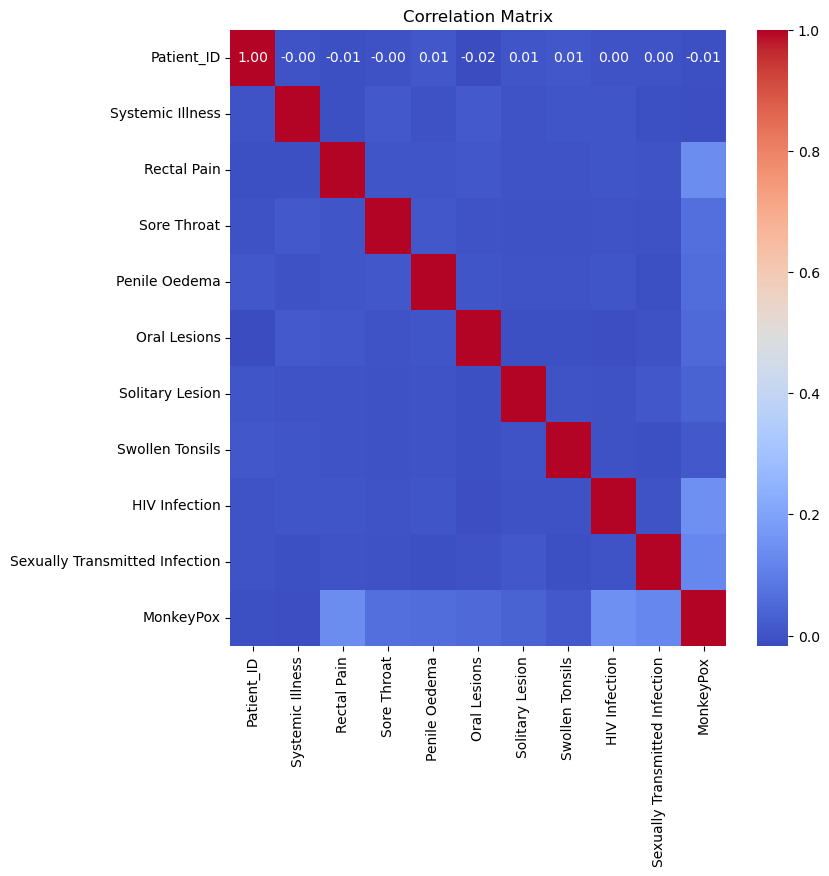

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Selection Using Mutual Information

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np

# Load your dataset
# data = pd.read_csv("DATA.csv")  # Uncomment and modify this line to load your dataset

# Assuming 'MonkeyPox' is the target variable and the rest are features
X = data.drop(columns=['MonkeyPox'])  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with mutual_info_classif
k = 10  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Transform the test set
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_indices]

# Print the selected feature names and their scores
print("Selected Features:", selected_feature_names.tolist())
print("Feature Scores:", selector.scores_[selected_indices])

Selected Features: ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']
Feature Scores: [0.00514062 0.01022301 0.00768528 0.0055796  0.00171247 0.00294299
 0.00664362 0.         0.01974045 0.00412778]


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    f1_score
)
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with mutual_info_classif
k = 10  # Number of top features to select
fs = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = fs.fit_transform(X_train, y_train)
X_test_selected = fs.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC AUC
y_prob = model.predict_proba(X_test_selected)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate specificity
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity = TN / (TN + FP)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Print feature scores
feature_scores = fs.scores_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Score': feature_scores})
importance_df = importance_df.sort_values(by='Score', ascending=False)
print("\nFeature Scores:\n", importance_df)

Accuracy: 0.6134
Precision: 0.7016
Recall: 0.7039
F1 Score: 0.7028
ROC AUC: 0.6239
Specificity: 0.4458
Confusion Matrix:
 [[ 782  972]
 [ 961 2285]]

Feature Scores:
                           Feature     Score
1                Systemic Illness  0.018787
8                   HIV Infection  0.009060
2                     Rectal Pain  0.006319
7                 Swollen Tonsils  0.003701
3                     Sore Throat  0.002714
5                    Oral Lesions  0.000733
6                 Solitary Lesion  0.000333
0                      Patient_ID  0.000000
4                   Penile Oedema  0.000000
9  Sexually Transmitted Infection  0.000000


# BOURTA ALGORITHM 

In [33]:
pip install Boruta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    f1_score
)
X = data.drop(columns=['MonkeyPox'])
y = data['MonkeyPox']  # Target variable                                                                
# Define the random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=7)

# Initialize Boruta
feat_selector = BorutaPy(
    estimator=rf,
    n_estimators='auto',
    verbose=2,
    random_state=1
)

# Fit Boruta
feat_selector.fit(X_train.values, y_train.values)

# Check selected features
selected_features = feat_selector.support_
print("Selected Features:", X.columns[selected_features])

# Check ranking of features
print("Feature Rankings:", feat_selector.ranking_)
print(f"Accuracy: {accuracy:.2f}")


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration:

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    f1_score
)
from boruta import BorutaPy

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=7, random_state=42)

# Initialize Boruta
boruta_selector = BorutaPy(
    estimator=rf,
    n_estimators='auto',
    verbose=2,
    random_state=42
)

# Fit Boruta
boruta_selector.fit(X_train.values, y_train.values)

# Get the selected features
selected_features = X.columns[boruta_selector.support_]
print("Selected Features:", selected_features)

# Transform the training and test sets
X_train_boruta = boruta_selector.transform(X_train.values)
X_test_boruta = boruta_selector.transform(X_test.values)

# Train the model using the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_boruta, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_boruta)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC AUC
y_prob = model.predict_proba(X_test_boruta)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate specificity
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity = TN / (TN + FP)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:\n", conf_matrix)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration:

# Navie Bayes 

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with mutual_info_classif to select top k features
k = 9 # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy:.4f}")

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

Accuracy: 0.6898


# Random forest 

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Select features based on importance (you can choose a threshold or top k features)
# Here, we select the top 5 features
indices = importances.argsort()[::-1][:10]
selected_features = X.columns[indices]

# Transform the training and test sets to only include selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model again using only the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy:.4f}")

# Print the selected features and accuracy
print("Selected Features:", selected_features)

Accuracy: 0.6140
Selected Features: Index(['Patient_ID', 'Systemic Illness', 'HIV Infection', 'Swollen Tonsils',
       'Rectal Pain', 'Sexually Transmitted Infection', 'Solitary Lesion',
       'Oral Lesions', 'Sore Throat', 'Penile Oedema'],
      dtype='object')


# Decision Tree 

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Select features based on importance (you can choose a threshold or top k features)
# Here, we select the top 5 features
indices = importances.argsort()[::-1][:10]
selected_features = X.columns[indices]

# Transform the training and test sets to only include selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model again using only the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy:.4f}")

# Print the selected features and accuracy
print("Selected Features:", selected_features)

Accuracy: 0.5986
Selected Features: Index(['Patient_ID', 'Systemic Illness', 'Swollen Tonsils', 'Solitary Lesion',
       'Penile Oedema', 'Sore Throat', 'Oral Lesions', 'Rectal Pain',
       'HIV Infection', 'Sexually Transmitted Infection'],
      dtype='object')
Accuracy: 0.5986


# Lasso  Regression 

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit Lasso Regression
lasso = Lasso(alpha=0.02)  # You can adjust the alpha parameter
lasso.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[lasso.coef_ != 0]

# Transform the training and test sets to only include selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a Logistic Regression model using only the selected features
logistic_model = LogisticRegression()
logistic_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features and accuracy
print("Selected Features:", selected_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

Selected Features: ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection']
Accuracy: 0.6756


# Support Vector  Machine  (SVM)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm = SVC(kernel='linear', random_state=42)

# Initialize RFE with the SVM model
rfe = RFE(estimator=svm, n_features_to_select=4)  # Select the top 5 features
rfe.fit(X_train, y_train)

# Get the selected feature names
selected_features = X.columns[rfe.support_]

# Transform the training and test sets to only include selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the SVM model using only the selected features
svm.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features and accuracy
print("Selected Features:", selected_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the BEV feature selector
from boruta import BorutaPy
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=3, random_state=42)
bev_selector = BorutaPy(estimator=rf, n_estimators='auto', verbose=2, random_state=42)

# Fit the BEV selector
bev_selector.fit(X_train.values, y_train.values)

# Get the selected features
selected_features = X.columns[bev_selector.support_]

# Transform the training and test sets to only include selected features
X_train_selected = bev_selector.transform(X_train.values)
X_test_selected = bev_selector.transform(X_test.values)

# Train a Random Forest model using only the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features and accuracy
print("Selected Features:", selected_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration:

# Gradient Boosting 

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler


# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train_scaled, y_train)

# Get feature importances
importances = gb_model.feature_importances_

# Select features based on importance
selector = SelectFromModel(gb_model, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Train the model again using only the selected features
gb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features and accuracy
print("Selected Features:", selected_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

Selected Features: ['Rectal Pain', 'HIV Infection', 'Sexually Transmitted Infection', 'Systemic Illness_Fever', 'Systemic Illness_Muscle Aches and Pain', 'Systemic Illness_Swollen Lymph Nodes']
Accuracy: 0.6964


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler


# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train_scaled, y_train)

# Use SelectFromModel to select features based on importance
# You can specify the threshold to select a certain number of features
threshold = 0.02  # This threshold can be adjusted based on your needs
selector = SelectFromModel(gb_model, threshold=threshold, prefit=True)

# Transform the training and test sets to only include selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Train the model again using only the selected features
gb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features and accuracy
print("Selected Features:", selected_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

Selected Features: ['Patient_ID', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection', 'Systemic Illness_Fever', 'Systemic Illness_Muscle Aches and Pain', 'Systemic Illness_Swollen Lymph Nodes', 'Systemic Illness_Unknown']
Accuracy: 0.7036


# L1 (LASSO)

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np


# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression with a specified alpha (regularization strength)
alpha = 0.1  # You can adjust this value
lasso_model = Lasso(alpha=alpha)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Get the coefficients and their corresponding feature names
coefficients = lasso_model.coef_
feature_names = X.columns

# Create a Dati waaFrame to hold feature names and their coefficients
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the sorted DataFrame
print(feature_importance_df)

                          Feature   Coefficient  Abs_Coefficient
0                      Patient_ID -7.440084e-08     7.440084e-08
1                Systemic Illness -0.000000e+00     0.000000e+00
2                     Rectal Pain  0.000000e+00     0.000000e+00
3                     Sore Throat  0.000000e+00     0.000000e+00
4                   Penile Oedema  0.000000e+00     0.000000e+00
5                    Oral Lesions  0.000000e+00     0.000000e+00
6                 Solitary Lesion  0.000000e+00     0.000000e+00
7                 Swollen Tonsils  0.000000e+00     0.000000e+00
8                   HIV Infection  0.000000e+00     0.000000e+00
9  Sexually Transmitted Infection  0.000000e+00     0.000000e+00


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
import numpy as np

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression with a specified alpha (regularization strength)
alpha = 0.1  # You can adjust this value
lasso_model = Lasso(alpha=alpha)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Get the coefficients and their corresponding feature names
coefficients = lasso_model.coef_
feature_names = X.columns

# Create a DataFrame to hold feature names and their coefficients
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Specify the number of features to select
k = 8 #Change this value to the desired number of features

# Select the top k features based on absolute coefficients
top_k_features = feature_importance_df.head(k)['Feature'].values

# Transform the training and test sets to only include selected features
X_train_selected = X_train[top_k_features]
X_test_selected = X_test[top_k_features]

# Train the Lasso model again using only the selected features
lasso_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_selected)

# Convert predictions to binary if needed (assuming binary classification)
y_pred_binary = (y_pred > 0.5).astype(int)  # Adjust threshold as needed

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the selected features and accuracy
print("Selected Features:", top_k_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

Selected Features: ['Patient_ID', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection']
Accuracy: 0.6492


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
import numpy as np

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression with a specified alpha (regularization strength)
alpha = 0.1  # You can adjust this value
lasso_model = Lasso(alpha=alpha)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Get the coefficients and their corresponding feature names
coefficients = lasso_model.coef_
feature_names = X.columns

# Create a DataFrame to hold feature names and their coefficients
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Specify the number of features to select
k = 8  # Change this value to the desired number of features

# Select the top k features based on absolute coefficients
top_k_features = feature_importance_df.head(k)['Feature'].values

# Transform the training and test sets to only include selected features
X_train_selected = X_train[top_k_features]
X_test_selected = X_test[top_k_features]

# Fit the Lasso model again using only the selected features
lasso_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_selected)

# Convert predictions to binary if needed (assuming binary classification)
y_pred_binary = (y_pred > 0.5).astype(int)  # Adjust threshold as needed

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the sorted DataFrame, selected features, and accuracy
print("Feature Importance:")
print(feature_importance_df)
print("\nSelected Features:", top_k_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

Feature Importance:
                                   Feature   Coefficient  Abs_Coefficient
0                               Patient_ID -7.440084e-08     7.440084e-08
1                              Rectal Pain  0.000000e+00     0.000000e+00
2                              Sore Throat  0.000000e+00     0.000000e+00
3                            Penile Oedema  0.000000e+00     0.000000e+00
4                             Oral Lesions  0.000000e+00     0.000000e+00
5                          Solitary Lesion  0.000000e+00     0.000000e+00
6                          Swollen Tonsils  0.000000e+00     0.000000e+00
7                            HIV Infection  0.000000e+00     0.000000e+00
8           Sexually Transmitted Infection  0.000000e+00     0.000000e+00
9                   Systemic Illness_Fever  0.000000e+00     0.000000e+00
10  Systemic Illness_Muscle Aches and Pain -0.000000e+00     0.000000e+00
11    Systemic Illness_Swollen Lymph Nodes  0.000000e+00     0.000000e+00
12                

# XGBOOST

In [37]:

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.drop(columns=['MonkeyPox'])  # Replace 'MonkeyPox' with your target variable
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# Use SelectFromModel to select features based on importance
selector = SelectFromModel(xgb_model, threshold='mean', prefit=True)

# Transform the training and test sets to only include selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Train the model again using only the selected features
xgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features and accuracy
print("Selected Features:", selected_features.tolist())
print(f"Accuracy: {accuracy:.4f}")

ModuleNotFoundError: No module named 'xgboost'